## Transformation of experimental dispersion data to the center-of-mass system and comparison with the Rutherford cross section

In a scattering experiment a beam of $^9\mathrm{Be}$ ($Z_P = 4$) nuclei with energy 
$E_{\mathrm{lab}} = 19 \, \mathrm{MeV}$ impinges on a thin solid target of 
$^{64}\mathrm{Zn}$ ($Z_T = 30$). The scattered particles are measured by a set of five detectors distributed on 
a circumference at the angles (referred to the beam direction) $\theta_1, \ldots, \theta_5$.

The yields in the detectors, $N(\theta)$, are listed in the table below. The experimental setup is such that the product 
$J \cdot n \cdot \Delta \Omega = 2.9 \times 10^{27} \, \mathrm{cm}^{-2}$.

Transform these angles to the CM-frame and obtain the corresponding experimental cross sections. Plot the experimental 
points in comparison with the Rutherford cross section.

$$
\left( \frac{d\sigma}{d\Omega} \right)_{\mathrm{Ruth}} = \frac{a^2}{4} \left[ \frac{1}{\sin^4 (\theta/2)} \right]
$$

with

$$
a = \frac{1}{2} \left( \frac{e^2 Z_P Z_T}{4\pi \varepsilon_0 E} \right),
$$

where $e$ is the absolute value of the electronic charge and 
$v = \sqrt{2 E_{\mathrm{lab}} / M_P}$.

**Canto, L. F., & Hussein, M. S.** (2013). *Scattering Theory of Molecules, Atoms and Nuclei*. World Scientific Publishing.



| $\theta$ (deg)     | 30         | 60         | 90       | 120      | 150      |
|--------------------|------------|------------|----------|----------|----------|
| $N(\theta)$        | 32983 ± 181| 2296 ± 50  | 545 ± 10 | 181 ± 7  | 82 ± 3   |


In [125]:
import numpy as np
import matplotlib.pyplot as plt

theta_lab_deg_ = np.array([30, 60, 90, 120, 150])
theta_lab_rad = np.radians(theta_lab_deg_)   # Convert degrees to radians
mP = 9.0121822                               # Mass of beryllium-9 in atomic mass units (u)
mT = 63.9291                                 # Mass of Zinc-64 in atomic mass units (u)
λ = mP / mT                                  # Ratio of masses

To transform the angles of the laboratory we use equation (1.30) valid for  λ < 1
$$
\cos \theta_{\text{c.m.}} = -\lambda \sin^2 \theta_{\text{lab}} 
+ \cos \theta_{\text{lab}} \sqrt{1 - \lambda^2 \sin^2 \theta_{\text{lab}}}, 
\quad \text{for } \lambda < 1 \tag{1.30}
$$


In [126]:
def angles_in_CM(theta):
     alpha =  np.arccos( - λ * np.sin(theta)**2 + np.cos(theta) * np.sqrt(1 - λ**2 * np.sin(theta)**2))
     return alpha

theta_cm_rad = (angles_in_CM(theta_lab_rad)) 
theta_cm_deg = np.degrees(theta_cm_rad) 
print("Theta in CM (degrees):", np.round(theta_cm_deg, 4))
 

Theta in CM (degrees): [ 34.0419  67.0124  98.1041 127.0124 154.0419]


| θ_lab (deg) | θ_CM (deg) |
|-------------|------------|
| 30          | 34.0419    |
| 60          | 67.0124    |
| 90          | 98.1041    |
| 120         | 127.0124   |
| 150         | 154.0419   |


In [127]:
N_theta  = np.array([32983, 2296, 545, 181, 82]) # Yield in the detector (counts)
N_theta_error = np.array([181,50, 10,7,3])
J_n_domega  = 2.9e27                              # cm^(-2)

$$
\left( \frac{d\sigma}{d\Omega} \right)_{\mathrm{Lab}} = \frac{N(\theta)}{J \cdot n \cdot \Delta \Omega}
$$


In [128]:
cross_section_lab  = N_theta / J_n_domega
cross_section_error = N_theta_error / J_n_domega
cross_section_lab_b = cross_section_lab / 1e-24
cross_section_error_b = cross_section_error / 1e-24  # Convert to barns/sr

for i in range(len(N_theta)):
    print(f"θ = {30 + i*30}°: σ_lab = {cross_section_lab_b[i]:.3f} ± {cross_section_error_b[i]:.3f} b/sr")

θ = 30°: σ_lab = 11.373 ± 0.062 b/sr
θ = 60°: σ_lab = 0.792 ± 0.017 b/sr
θ = 90°: σ_lab = 0.188 ± 0.003 b/sr
θ = 120°: σ_lab = 0.062 ± 0.002 b/sr
θ = 150°: σ_lab = 0.028 ± 0.001 b/sr


Experimental Cross Section in CM Frame:
θ_CM = 34.04°: σ_CM = 9.051 ± 0.050 b/sr
θ_CM = 67.01°: σ_CM = 0.695 ± 0.015 b/sr
θ_CM = 98.10°: σ_CM = 0.190 ± 0.003 b/sr
θ_CM = 127.01°: σ_CM = 0.073 ± 0.003 b/sr
θ_CM = 154.04°: σ_CM = 0.037 ± 0.001 b/sr


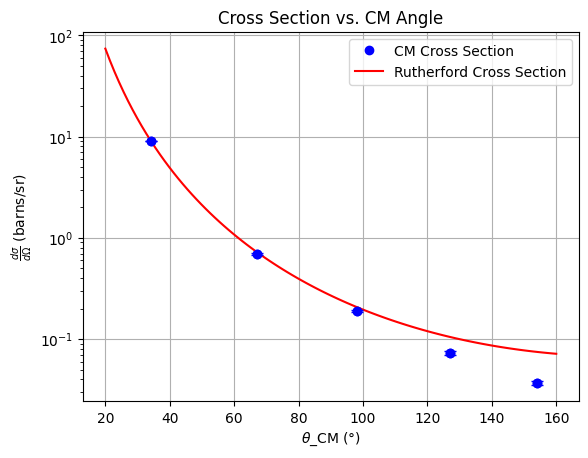

In [130]:
#Rutherford cross section
ZP = 4    
ZT = 30
b = 1.44                               # e^2 / 4πε  MeV*fm
Elab = 19.0                            # MeV
Ecm  = mT  * Elab/ (mT + mP)           # MeV
a  = 0.5 *(b * ZP * ZT) / Ecm 
theta = np.linspace(20,160,100)
cross_section_rutherford  = ((a**2)/4 )/(np.sin(np.deg2rad(theta)/2)**4)

#CM cross section
J = (λ * np.cos(theta_cm_rad ) + 1 ) / (λ**2  + 1 + 2 * λ * np.cos(theta_cm_rad))**(3/2)
cross_section_cm = (cross_section_lab * J )*1e24  

cross_section_error_cm = cross_section_error * J * 1e24
plt.plot(theta_cm_deg, cross_section_cm, 'o', label='CM Cross Section', color = 'b')
plt.plot(theta, cross_section_rutherford*1e-2,  label='Rutherford Cross Section', color = 'r')
plt.errorbar(theta_cm_deg, cross_section_cm, yerr=cross_section_error_cm,
             fmt='o', capsize=4, color = 'b')
plt.legend()
plt.yscale('log')
plt.title('Cross Section vs. CM Angle')
plt.xlabel(r'$\theta$_CM (°)')
plt.ylabel(r'$\frac{d\sigma}{d\Omega}$ (barns/sr)')
plt.grid()

print("Experimental Cross Section in CM Frame:")
for i in range(len(theta_cm_deg)):
    print(f"θ_CM = {theta_cm_deg[i]:.2f}°: σ_CM = {cross_section_cm[i]:.3f} ± {cross_section_error_cm[i]:.3f} b/sr")


| θ_lab (°) | θ_CM (°) | σ_lab (b/sr) | σ_CM (b/sr) |
|-----------|----------|---------------|--------------|
|    30     |  34.04   |    11.373     |     9.051    |
|    60     |  67.01   |     0.792     |     0.695    |
|    90     |  98.10   |     0.188     |     0.190    |
|   120     | 127.01   |     0.062     |     0.073    |
|   150     | 154.04   |     0.028     |     0.037    |
